## Initialization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

C:\Users\user\AppData\Local\Temp\ipykernel_15308\4224450139.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


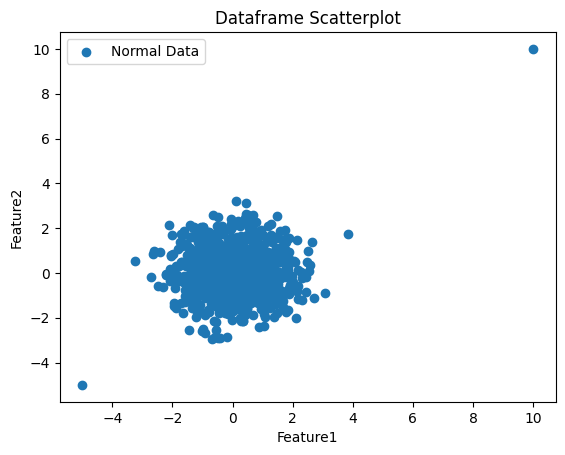

In [2]:
# sample dataset
np.random.seed(42)
df = pd.DataFrame({
    'Feature1': np.random.normal(0, 1, 1000),
    'Feature2': np.random.normal(0, 1, 1000)
})

# add some anomalies
df.loc[0] = [10, 10]
df.loc[1] = [-5, -5]

plt.scatter(df['Feature1'], df['Feature2'], label='Normal Data')
plt.legend()
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Dataframe Scatterplot')
plt.show()

## Z-score anomalies (statistical method)

C:\Users\user\AppData\Local\Temp\ipykernel_19168\640628499.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


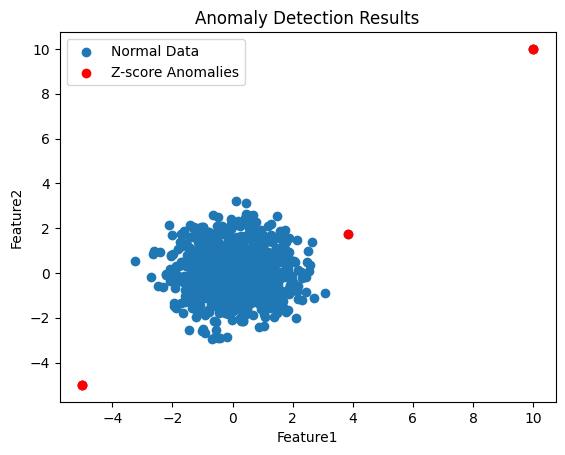

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# sample dataset
np.random.seed(42)

df = pd.DataFrame({
    'Feature1': np.random.normal(0, 1, 1000),
    'Feature2': np.random.normal(0, 1, 1000)
})

# add spme anomalies
df.loc[0] = [10, 10]
df.loc[1] = [-5, -5]

# standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Statistical Methods
# 1. z-score
z_scores_anomalies = np.where((np.abs(scaled_data) > 3.5), True, False)

plt.scatter(df['Feature1'], df['Feature2'], label = 'Normal Data')
plt.scatter(df[z_scores_anomalies]['Feature1'], df[z_scores_anomalies]['Feature2'], color = 'red', label = 'Z-score Anomalies')
plt.legend()
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Anomaly Detection Results')
plt.show()

## Modified Z-score anomalies (Statistical Method)

- no assumption of normal distribution (suitable for data that might deviate from normality)
- independence assumption (somilar to the z-score , the modified z-score method assumes that data points are independent of each other)
- equal variance assumption (the modified z-score is not as sensitive to variance differences across the dataset as the standard z-score, but it's still preferable if the variance across the dataset is relatively consistent.)
- outlier proportion assumption (The method is useful when dealing with datasets containing a proportion of outliers that might be relatively larger, as it's less influenced by extreme values)
- symmetry assumption (while the modified z-score is more robust to skewed distributions and outliers than the standard z-score, it's still advisable to examine the distribution of your data and assess its symmetry


In [10]:
import sklearn

In [12]:
k=1.4826
threshold = 2.5
modified_z_scores = (df - df.median())/( k * df.mad())
modified_z_scores_anomalies = np.where((modified_z_scores > threshold) | (modified_z_scores < -1*threshold), True, False)

plt.scatter(df['Feature1'], df['Feature2'], label='Normal Data')
plt.scatter(df[modified_z_scores_anomalies]['Feature1'], df[modified_z_scores_anomalies]['Feature2'], color='red', label='Z-score Anomalies')
plt.legend()
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Anomaly Detection Results')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'mad'

In [15]:
df.mad(axis=None)

AttributeError: 'DataFrame' object has no attribute 'mad'

In [19]:
# A code to illustrate the mad() function in Pandas

# Importing the pandas library
import pandas as pd

# Creating a DataFrame
df = pd.DataFrame([[5,10,4,15,3],
                   [1,7,5,9,0.5],
                   [3,11,13,14,12]],
                   columns=list('ABCDE'))
# Printing the DataFrame
print(df)

# Obtaining the mean absolute deviation vertically across the rows
print(df.mad())

# Obtaining the cumulative maximum horizontally over the columns
print(df.mad(axis="columns"))

   A   B   C   D     E
0  5  10   4  15   3.0
1  1   7   5   9   0.5
2  3  11  13  14  12.0


AttributeError: 'DataFrame' object has no attribute 'mad'

## Moving Averages

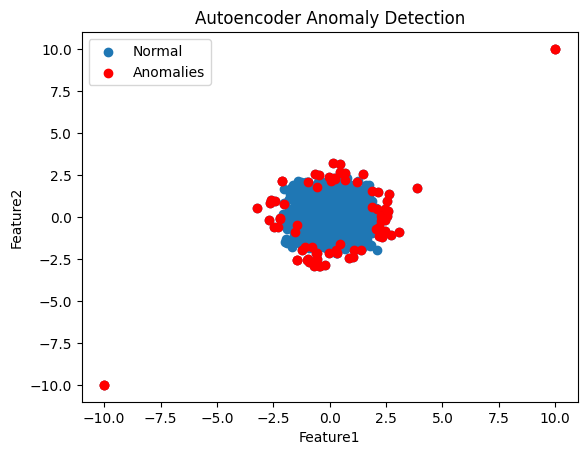

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset
np.random.seed(42)
df = pd.DataFrame({
    'Feature1': np.random.normal(0, 1, 1000),
    'Feature2': np.random.normal(0, 1, 1000)
})

# Add some anomalies, I will add anomalies in the end of the dataset
df.iloc[-1] = [10, 10]
df.iloc[-2] = [-5 -5]


# Calculate moving averages
window_size = 50
moving_averages = df.rolling(window=window_size).mean()

# Calculate the standard deviation of the moving averages
moving_std = df.rolling(window=window_size).std()

# Calculate the z-scores
z_scores = (df - moving_averages) / moving_std

# Define a threshold for anomaly detection (adjust as needed)
threshold = 2

# Identify anomalies
anomalies = np.where(np.abs(z_scores) > threshold)

# Plot the dataset and anomalies
plt.scatter(df['Feature1'], df['Feature2'], label='Normal')
plt.scatter(df.iloc[anomalies[0]]['Feature1'], df.iloc[anomalies[0]]['Feature2'], color='red', label='Anomalies')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Autoencoder Anomaly Detection')
plt.legend()
plt.show()